# Bank Customer Churn Analysis and Prediction

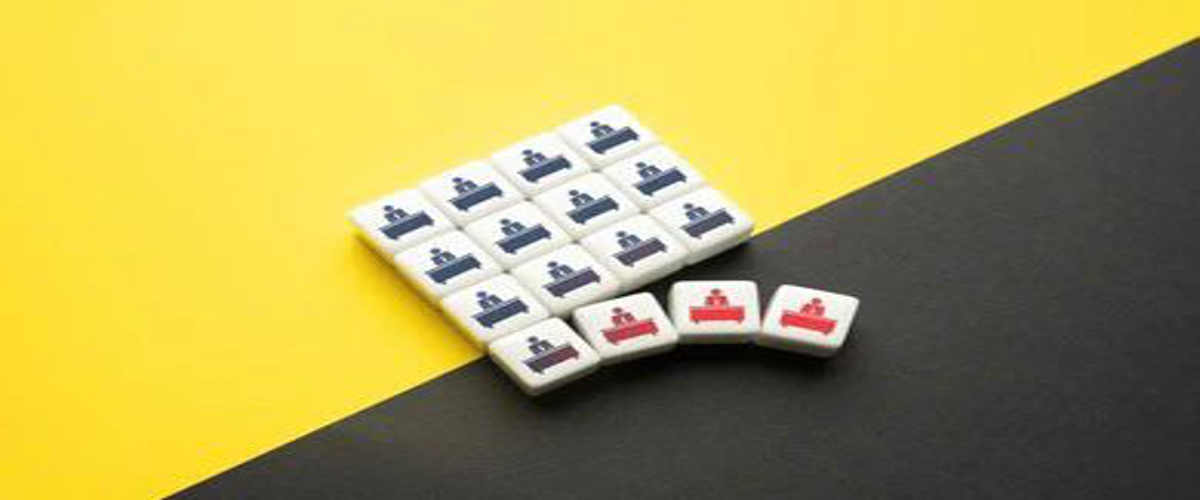

In [174]:
from PIL import Image
from IPython.display import display

# Open the image file
image = Image.open('Churn image.jpeg')

# Resizing the image to the desired height and width
new_width = 1200  # Adjusting the width
new_height = 500  # Adjusting the height
resized_image = image.resize((new_width, new_height))

# Display the resized image
display(resized_image)

This dataset focuses on customer's churn in the banking sector, examining various influencing factors. Before delving into the analysis, I believe it's  essential to clarity the concept of churn for better undertanding. Churn, also known as 'Exit,' refers to customers leaving a service or place, either voluntarily or due to specific circumstances. On the flip side, 'retention' represents those customers who choose to stay.

In this analysis, the aim is to predict whether specific factors impact churn rates within the bank. This exploration will provide valuable insights into the reasons behind customer departures and the factors that warrant examination. 


This dataset comprises a combination of variables, and it's worth noting its origin from Kaggle.

# The Data

- RowNumber: Corresponds to the record (row) number and has no effect on the output.
- CustomerId: Contains random values and has no impact on the customer's decision to leave the bank.
- Surname: The surname of a customer has no influence on their decision to leave the bank.
- CreditScore: Can affect customer churn, as customers with higher credit scores are less likely to leave.
- Geography: A customer's location can impact their decision to leave the bank.
- Gender: It's interesting to explore whether gender plays a role in customer departures.
- Age: Relevant, as older customers are less likely to leave the bank than younger ones.
- Tenure: Refers to the number of years the customer has been a client; older clients tend to be more loyal.
- Balance: A good indicator of customer churn; higher balances correlate with lower chances of leaving.
- NumOfProducts: Indicates the number of products a customer has purchased through the bank.
- HasCrCard: Denotes whether a customer has a credit card; this can affect churn rates.
- IsActiveMember: Active customers are less likely to leave the bank.
- EstimatedSalary: Similar to balance, customers with lower salaries are more likely to leave.
- Exited: Indicates whether the customer left the bank or not."


## Objectives of the Dataset

In this dataset, the primary focus revolves around the dependent variable, "Exited". This variable also serves as the target, and the objective is to predict and provide explanations for its outcomes using the various independent variables present in the dataset.

The overall goal is to gain profound insights into customer behavior and the driving forces behind their decisions to either stay or leave the bank.

In [113]:
#importing required libraries
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [114]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Explore the data

In [127]:
#the number of rows and columns 
rows, columns = df.shape
print(f"There are {rows} rows and {columns} columns in the dataset")

There are 10000 rows and 11 columns in the dataset


### Top 5 Values from the Dataset

In [115]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Bottom 5 Values in the Dataset

In [129]:
df.tail()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Missing Values Summary

In [130]:
missing_values = df.isna().sum()
missing_values

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_credit_card     0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

### Data Types

In [131]:
# Accessing data types of DataFrame columns
column_data_types = df.dtypes
column_data_types

credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_credit_card       int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

### Duplicate Rows Count

In [132]:
# Checking for duplicate rows in a DataFrame
duplicate_rows = df[df.duplicated()].count()
duplicate_rows

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_credit_card     0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

### Summary Statistics for All Columns

In [133]:
# Getting the summary statistics of all columns in the DataFrame
summary_stats = df.describe(include='all')
summary_stats.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
credit_score,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
num_of_products,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
has_credit_card,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
is_active_member,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
estimated_salary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


# Data Cleaning

#### 1. Convert Column Names to Lowercase

In [134]:
# Convert all columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

#### 2. Renaming DataFrame Columns

In [122]:
# Renaming DataFrame columns for Improved Clarity
df.rename(columns = {'rownumber' : 'row_number',
                      'customerid' : 'customer_id',
                      'creditscore' : 'credit_score',
                      'numofproducts': 'num_of_products',
                      'hascrcard': 'has_credit_card',
                      'isactivemember' : 'is_active_member',
                      'estimatedsalary': 'estimated_salary'}, inplace = True)

#### 3. Dropping Unnecessary Columns

In [123]:
# Dropping Unnecessary Columns for Improved Prediction
df = df.drop(columns = ["row_number", "customer_id", "surname"])

# Exploratory Data Analysis

- In this section, I'll delve into the dataset to gain insights and clarity regarding the factors influencing customer churn. This involves focusing on examining the distribution of age, customer segmentation and many more.

- "The 'Exited' variable, which have a value of either 0 or 1, is like a traffic light for us in this analysis. It helps to figure out whether a customer decided to stay with the bank (0) or leave (1). So, it's a bit like a 'stay or go' signal.


### 1. The Distribution of Churn (Exited)

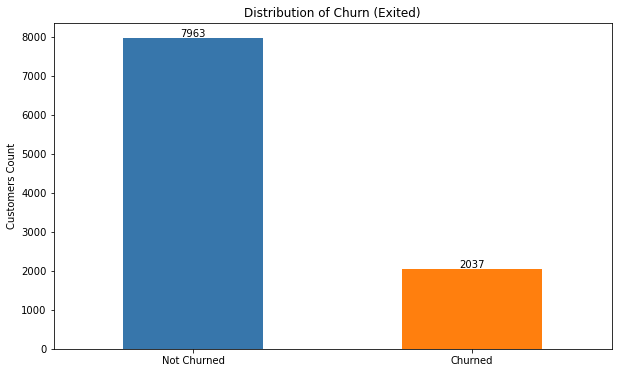

In [143]:
# Count the occurrences of each class in the "exited" column
exited_counts = df['exited'].value_counts()

# Create labels for the x-axis
exited_labels = ['Not Churned', 'Churned']

# Plot the distribution
plt.figure(figsize = (10, 6))
ax = exited_counts.plot(kind = 'bar', color = ['#3776ab', 'C1'])

# Add the title
plt.title('Distribution of Churn (Exited)')

# Label the axes
plt.ylabel('Customers Count')

# Customize the x-axis tick labels
plt.xticks(range(len(exited_labels)), exited_labels, rotation=0)

# To get the  values at the top of each bar
for p in ax.patches:
    if not np.isnan(p.get_height()):  # Check for NaN values
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')

# Show the plot
plt.show()


#### The chart above indicates that that most customers(7963) which is about 79.63%, are still using the bank's services without leaving (not churned). On the other hand, around 20.37% of customers(2037) have decided to stop using the bank's services (churned).

### 2. Age Distribution Analysis: Understanding the Age Variation Between Churned and Non-Churned Customers

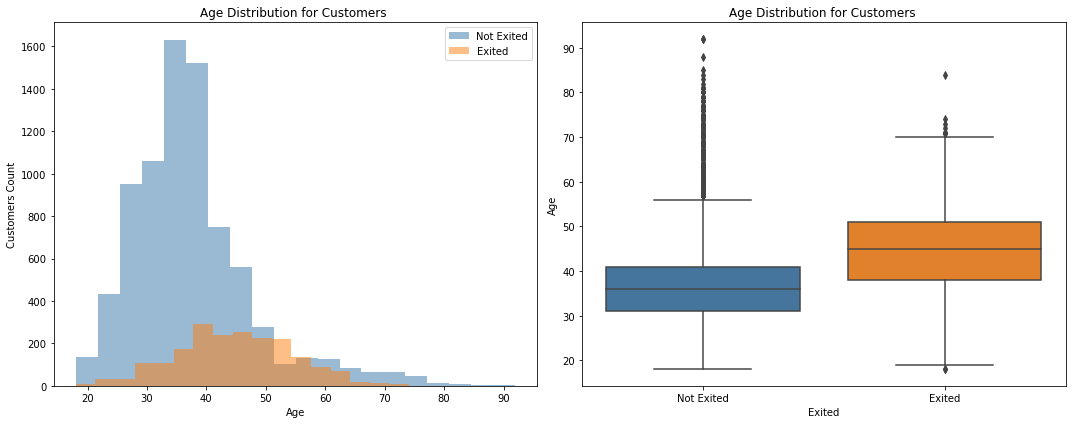

In [155]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram on the left subplot
axes[0].hist(df[df['exited'] == 0]['age'], bins=20, alpha=0.5, label='Not Exited', color='#3776ab')
axes[0].hist(df[df['exited'] == 1]['age'], bins=20, alpha=0.5, label='Exited', color='C1')
axes[0].set_title('Age Distribution for Customers ')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Customers Count')
axes[0].legend()

# Plot the box plots on the right subplot
sns.boxplot(x = 'exited', y = 'age', data = df, palette = ['#3776ab', 'C1'], ax = axes[1])
axes[1].set_title('Age Distribution for Customers ')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Age')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Exited', 'Exited'])

plt.tight_layout()
plt.show()

- #### This analysis reveals that both groups(exited vs not exited) include customers as young as 18 years old. There is also a significant difference in the age of the oldest individuals. Customers who remained with the bank have an age range extending up to 92 years, while exiting customers have a maximum age of 84 years.

- #### It also appears that customers who leave the bank tend to be closer in age to each other compared to those who stay. This could mean that age plays a role in why some customers leave.

### 3. Customer Segmentation: Understanding How Different Customer Groups Relate to Churn

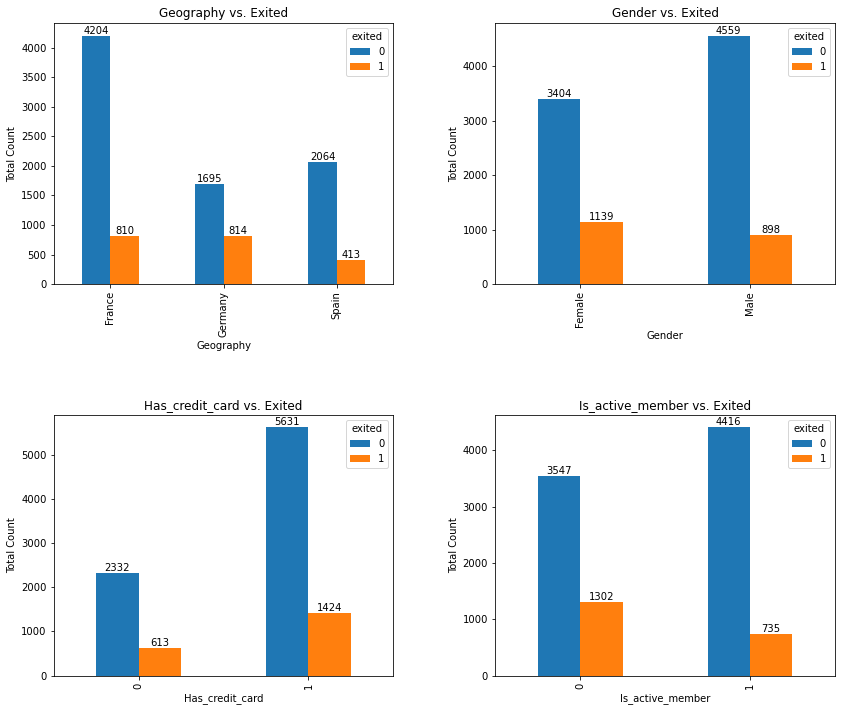

In [157]:
# List of categorical columns
categorical_columns = ["geography", "gender", "has_credit_card", "is_active_member"]

# Creating subplots in a 2x2 grid with increased spacing
fig, axes = plt.subplots(2, 2, figsize = (14, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)  # Adjust spacing here

# Creating individual bar charts for categorical columns
for i, col in enumerate(categorical_columns):

    # Group the data by the categorical column and "exited" column and get the counts
    data_grouped = df.groupby([col, 'exited']).size().unstack()

    # Creating a bar chart for the current categorical column
    ax = data_grouped.plot(kind='bar', ax=axes[i // 2, i % 2])

    # Set the title, x-axis label, and y-axis label
    ax.set_title(f"{col.capitalize()} vs. Exited")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Total Count")

    # Annotate with values at the top of each bar
    for p in ax.patches:
        if not np.isnan(p.get_height()):  # Check for NaN values
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom')

# Show the plots
plt.show()

#### From this chart, it can be seen that:

- 1.Geographic Impact:
In France, 39% of customers left, while in Spain, only 20% left. Germany falls somewhere in between.
 
- 2. Gender Matters:
Gender plays a role. Females (about 56%) decide to leave, whereas males (about 44%) make the same choice.
women are more inclined to disembark.


- 3.Credit Cards:
About 71% of cardholders stay, while 70% of non-cardholders remain. This suggests credit card ownership has a relatively minor impact on churn rates.


- 4. Activity Level:
Activity matters. Active member (like using  account actively) makes you more likely to stay. If you're not that active, there's a higher chance you might leave








In [163]:
# Calculate count of each category within 'has_credit_card' column by exit status
count_by_category = df.groupby(['exited', 'has_credit_card']).size()

# Extract counts for both exited and not exited
count_exited = count_by_category[1]
count_not_exited = count_by_category[0]

# Calculate summary statistics for 'has_credit_card' by exit status
summary_stats = df.groupby('exited')['has_credit_card'].describe()

# Format the output as requested
summary_stats['count'] = summary_stats['count'].astype(int)
summary_stats.loc[1, 'count'] = f"{summary_stats.loc[1, 'count']} ({count_exited})"
summary_stats.loc[0, 'count'] = f"{summary_stats.loc[0, 'count']} ({count_not_exited})"

# Print the formatted summary statistics
print(summary_stats)


                                                    count      mean       std  \
exited                                                                          
0       7963 (has_credit_card\n0    2332\n1    5631\nd...  0.707146  0.455101   
1       2037 (has_credit_card\n0     613\n1    1424\nd...  0.699067  0.458776   

        min  25%  50%  75%  max  
exited                           
0       0.0  0.0  1.0  1.0  1.0  
1       0.0  0.0  1.0  1.0  1.0  


In [168]:
# Calculate count of each category within 'has_credit_card' column by exit status
count_by_category = df.groupby(['exited', 'gender']).size()

# Extract counts for both exited and not exited
count_exited = count_by_category[1]
count_not_exited = count_by_category[0]

# Calculate summary statistics for 'has_credit_card' by exit status
summary_stats = df.groupby('exited')['gender'].describe()

# Format the output as requested
summary_stats['count'] = summary_stats['count'].astype(int)
summary_stats.loc[1, 'count'] = f"{summary_stats.loc[1, 'count']} ({count_exited})"
summary_stats.loc[0, 'count'] = f"{summary_stats.loc[0, 'count']} ({count_not_exited})"

# Print the formatted summary statistics
print(summary_stats)

                                                    count unique     top  freq
exited                                                                        
0       7963 (gender\nFemale    3404\nMale      4559\n...      2    Male  4559
1       2037 (gender\nFemale    1139\nMale       898\n...      2  Female  1139


In [170]:

# Calculate count of each category within 'has_credit_card' column by exit status
count_by_category = df.groupby(['exited', 'is_active_member']).size()

# Extract counts for both exited and not exited
count_exited = count_by_category[1]
count_not_exited = count_by_category[0]

# Calculate summary statistics for 'has_credit_card' by exit status
summary_stats = df.groupby('exited')['is_active_member'].describe()

# Format the output as requested
summary_stats['count'] = summary_stats['count'].astype(int)
summary_stats.loc[1, 'count'] = f"{summary_stats.loc[1, 'count']} ({count_exited})"
summary_stats.loc[0, 'count'] = f"{summary_stats.loc[0, 'count']} ({count_not_exited})"

# Print the formatted summary statistics
print(summary_stats)

                                                    count      mean       std  \
exited                                                                          
0       7963 (is_active_member\n0    3547\n1    4416\n...  0.554565  0.497045   
1       2037 (is_active_member\n0    1302\n1     735\n...  0.360825  0.480358   

        min  25%  50%  75%  max  
exited                           
0       0.0  0.0  1.0  1.0  1.0  
1       0.0  0.0  0.0  1.0  1.0  


In [172]:
# Calculate count of each category within 'geography' column by exit status
count_by_category = df.groupby(['exited', 'geography']).size()

# Extract counts for each category within 'geography'
count_france = count_by_category[0]['France']
count_germany = count_by_category[1]['Germany']
count_spain = count_by_category[0]['Spain']  # Add this line to extract the count for Spain

# Calculate summary statistics for 'geography' by exit status
summary_stats = df.groupby('exited')['geography'].describe()

# Format the output as requested
summary_stats['count'] = summary_stats['count'].astype(int)
summary_stats.loc[1, 'count'] = f"{summary_stats.loc[1, 'count']} ({count_germany})"
summary_stats.loc[0, 'count'] = f"{summary_stats.loc[0, 'count']} ({count_france})"
summary_stats.loc[0, 'top'] = "France"  # Set the 'top' value to 'France'
summary_stats.loc[0, 'freq'] = count_france  # Set the 'freq' value accordingly
summary_stats.loc[1, 'top'] = "Germany"  # Set the 'top' value to 'Germany'
summary_stats.loc[1, 'freq'] = count_germany  # Set the 'freq' value accordingly

# Add a new row for 'Spain'
summary_stats.loc[2] = [count_spain, 1, 'Spain', count_spain]

# Print the formatted summary statistics
print(summary_stats)


              count unique      top  freq
exited                                   
0       7963 (4204)      3   France  4204
1        2037 (814)      3  Germany   814
2              2064      1    Spain  2064


#### 4. Balance vs. Churn: Analyzing how the account balance relates to churn

In [69]:
# Define the bin edges
bin_edges = [-1, 50000, 100000, 150000, 200000, 250000, 300000]
b_edges = ['0-50000', '50001-100000', '100001-150000', '150001-200000', '200001-250000', '250000+']


# Create a new column in the DataFrame that represents the balance bins
df['balance_range'] = pd.cut(df['balance'], bins = bin_edges, labels = b_edges)

# Display the first few rows of the  new column 
print(df['balance_range'].head(3))

0          0-50000
1     50001-100000
2    150001-200000
Name: balance_range, dtype: category
Categories (6, object): ['0-50000' < '50001-100000' < '100001-150000' < '150001-200000' < '200001-250000' < '250000+']


In [153]:
# Create a bar plot
plt.figure(figsize = (12, 8))

# Plot the distribution
ax = sns.countplot(data = df, x = 'balance_range', hue = 'exited', palette = ['#3b7fb9', 'C1'])

# Add title
plt.title('Churn Count by Balance Range')

# Label axes
plt.xlabel('Balance Range')
plt.ylabel('Count')

plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability

# Add percentage labels
total = len(df['balance_range'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center')

plt.legend(labels = ['Not Exited', 'Exited'], loc = 'upper right')

# Show the plot
plt.show()



ValueError: Could not interpret input 'balance_range'

<Figure size 864x576 with 0 Axes>

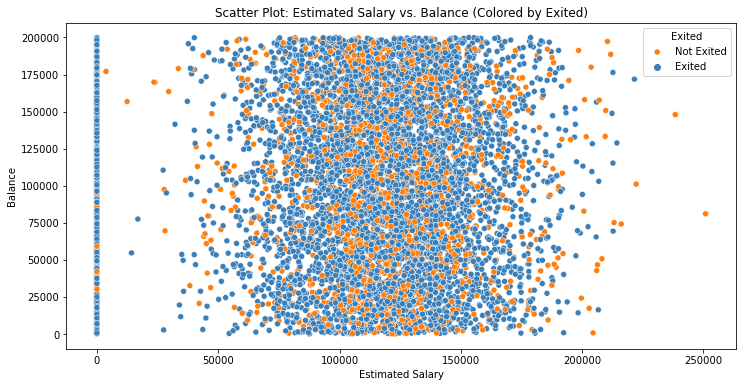

In [154]:
# Create a scatter plot
plt.figure(figsize = (12, 6))
sns.scatterplot(data = df, y = 'estimated_salary', x = 'balance', hue = 'exited', palette = {0: '#3b7fb9', 1: 'C1'})
plt.title('Scatter Plot: Estimated Salary vs. Balance (Colored by Exited)')
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.legend(title = 'Exited', loc = 'upper right', labels = ['Not Exited', 'Exited'])
plt.show()

Based on the provided data and the analysis, we can draw the following conclusions:

**1. Salary Distribution:**
   - Customers who did not exit (exited = 0) have a wide range of estimated salaries, ranging from lower to higher values.
   - Customers who exited (exited = 1) also have a varied salary distribution, but it tends to be more concentrated in the mid-range.
   - The median salary for customers who exited (exited = 1) appears to be slightly lower than for those who did not exit (exited = 0).

**2. Balance Distribution:**
   - Customers who did not exit (exited = 0) have a wide range of account balances.
   - Customers who exited (exited = 1) generally have lower account balances compared to those who did not exit.
   - The median balance for customers who exited (exited = 1) is noticeably lower than for those who did not exit (exited = 0).

##### **3. Relationship between Salary and Balance:**
   - The scatter plot shows that there is no clear linear relationship between estimated salary and balance for either group.
   - Both customers who exited (exited = 1) and those who did not exit (exited = 0) exhibit a wide range of balances at various salary levels.  
   
   
   
   
   
   
   

*4. Additional Analysis:*
the behavioral pattern showed that Many customers who exited (exited = 1) have a balance of 0.

Possible Interpretations:

Account Closure: Customers might have closed their accounts with a balance of 0 before exiting. This could indicate that these customers may not have actively used their accounts or may have withdrawn all funds before leaving.

Inactive Accounts: Customers who have not used their accounts for a while might have depleted their balances to 0 over time. In such cases, the account balance reaching 0 might be an indicator of inactivity and a precursor to account closure.

Implications:

The presence of customers with 0 balance among those who exited could be a valuable signal for customer churn prediction or identification.
It may be worth exploring the reasons behind customers allowing their balances to reach 0 before exiting, such as poor service, dissatisfaction, or better offers from competitors.

In [72]:
df.head(2)

,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,balance_range
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0-50000
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,50001-100000


### 6. Credit Card and Active Membership Impact:

In [73]:
# Grouping by Credit Card and Active Membership
grouped_data = df.groupby(['has_credit_card', 'is_active_member'])

# Calculate Churn Rate for each group
churn_rate = grouped_data['exited'].mean() * 100

# Calculate Retention Rate for each group
retention_rate = 100 - churn_rate

# Display the results
print("Churn Rate by Credit Card and Active Membership:")
print(churn_rate)

print("\nRetention Rate by Credit Card and Active Membership:")
print(retention_rate)


Churn Rate by Credit Card and Active Membership:
has_credit_card  is_active_member
0                0                   25.695931
                 1                   16.386010
1                0                   27.320186
                 1                   13.362905
Name: exited, dtype: float64

Retention Rate by Credit Card and Active Membership:
has_credit_card  is_active_member
0                0                   74.304069
                 1                   83.613990
1                0                   72.679814
                 1                   86.637095
Name: exited, dtype: float64


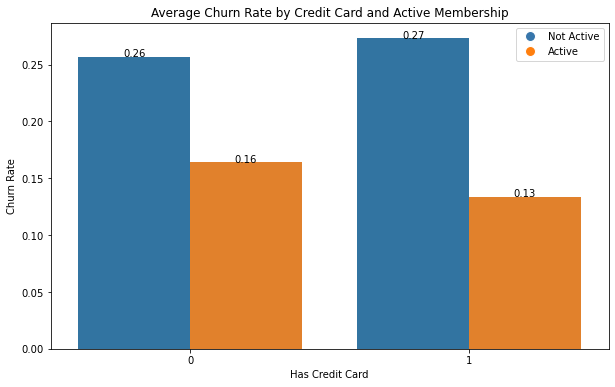

In [137]:
# Grouping by Credit Card and Active Membership
grouped_data = df.groupby(['has_credit_card', 'is_active_member'])['exited'].mean().reset_index()

# Create a bar chart with 'has_credit_card' and 'is_active_member' on the x-axis, and 'exited' as the hue
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = grouped_data, x = 'has_credit_card', y = 'exited', hue = 'is_active_member')

# Add labels and a legend with custom colors
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.title('Average Churn Rate by Credit Card and Active Membership')

# Define custom colors for legend labels
legend_colors = ['#3776ab', 'C1']

# Create custom legend handles with specified colors
legend_labels = ['Not Active', 'Active']
legend_handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', label=label, markerfacecolor = color, markersize = 10) for label, color in zip(legend_labels, legend_colors)]
# Add the legend with custom handles
plt.legend(handles = legend_handles, loc = 'upper right')

# Annotate with mean values on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center')

# Show the plot
plt.show()


In [75]:
df.head(2)

,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,balance_range
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0-50000
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,50001-100000


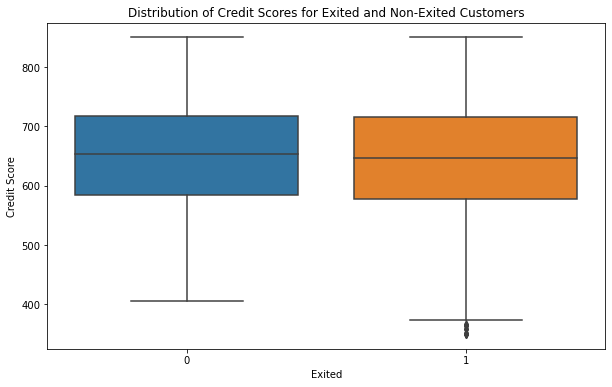

In [149]:
# Create a boxplot to visualize the distribution of credit scores for exited and non-exited customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='exited', y='credit_score', data=df)
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.title('Distribution of Credit Scores for Exited and Non-Exited Customers')
plt.show()

In [77]:
# Calculate summary statistics for credit scores by exit status
summary_stats = df.groupby('exited')['credit_score'].describe()

# Print the summary statistics
print(summary_stats)


         count        mean         std    min    25%    50%    75%    max
exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0


The data shows that, on average, customers who stayed with the company (non-exited) have a slightly higher credit score than those who left (exited). However, the difference in credit scores between the two groups is not very large.

This suggests that while credit score may have some influence on whether a customer stays or leaves, it's not the only factor at play. There are likely other important factors that also contribute to customer churn.

Therefore, to reduce churn and keep more customers, it's important to consider a broader range of factors that might be affecting customer decisions, such as the quality of service, product offerings, or customer engagement strategies

In [148]:
According to countries monthly average salaries


SyntaxError: invalid syntax (1949180801.py, line 1)